# Classification model

## Problem definition

- Classification using LogisticRegressionCV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


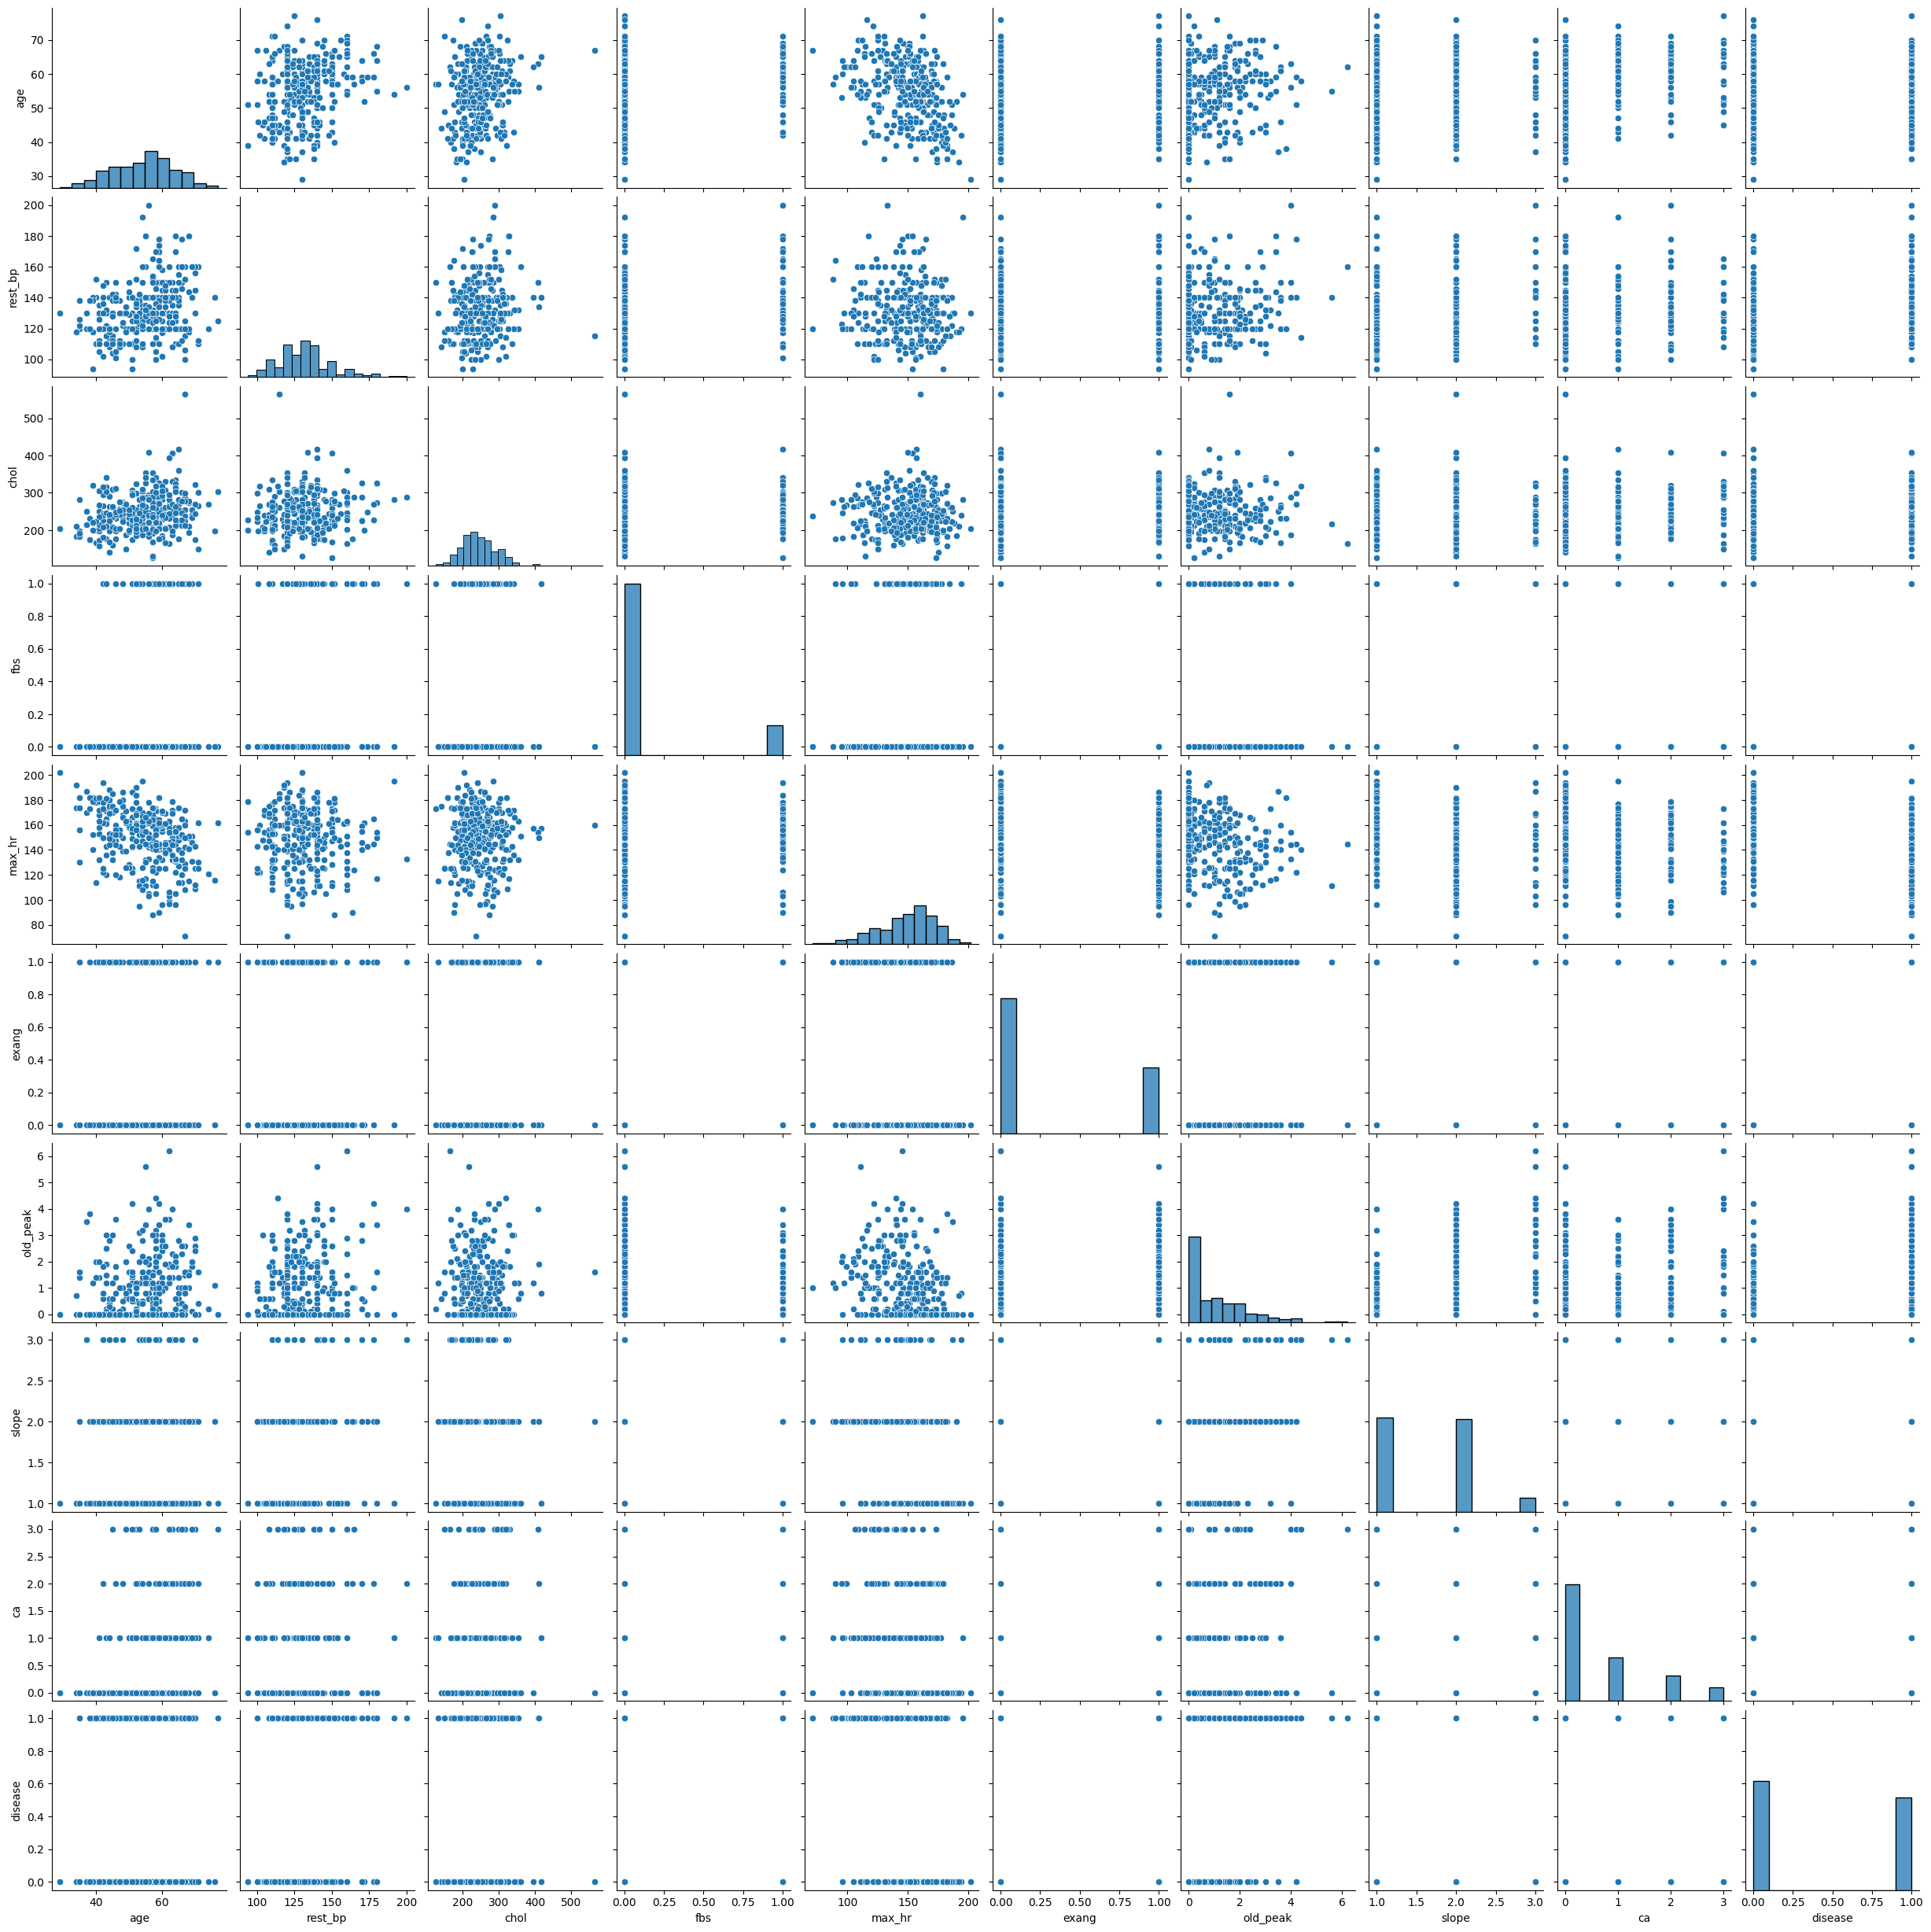

In [5]:
sns.pairplot(df)

In [5]:
df.corr(numeric_only=True)

,age,rest_bp,chol,fbs,max_hr,exang,old_peak,slope,ca,disease
age,1.000000,0.284946,0.208950,0.118530,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
rest_bp,0.284946,1.000000,0.130120,0.175340,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
chol,0.208950,0.130120,1.000000,0.009841,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
fbs,0.118530,0.175340,0.009841,1.000000,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
max_hr,-0.393806,-0.045351,-0.003432,-0.007854,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
exang,0.091661,0.064762,0.061310,0.025665,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
old_peak,0.203805,0.189171,0.046564,0.005747,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
slope,0.161770,0.117382,-0.004062,0.059894,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213
ca,0.362605,0.098773,0.119000,0.145478,-0.264246,0.145570,0.295832,0.110119,1.000000,0.460442
disease,0.223120,0.150825,0.085164,0.025264,-0.417167,0.431894,0.424510,0.339213,0.460442,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'chest_pain', 'rest_bp', 'chol', 'fbs', 'rest_ecg',
       'max_hr', 'exang', 'old_peak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

In [7]:
df.drop(['age', 'sex', 'chest_pain', 'rest_bp', 'chol', 'fbs', 'rest_ecg', 'thal'], 
        axis=1, inplace=True)


In [8]:
df.columns

Index(['max_hr', 'exang', 'old_peak', 'slope', 'ca', 'disease'], dtype='object')

In [9]:
df.isna().sum()

max_hr      0
exang       0
old_peak    0
slope       0
ca          4
disease     0
dtype: int64

In [10]:
df['ca'].fillna(df['ca'].mean(), inplace=True)
df.isna().sum()

max_hr      0
exang       0
old_peak    0
slope       0
ca          0
disease     0
dtype: int64

In [11]:
x = df[['max_hr', 'exang', 'old_peak', 'slope', 'ca']]
y = df['disease']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [28]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)

LogisticRegressionCV()

In [29]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[36,  6],
       [14, 20]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7368421052631579

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7692307692307693

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5882352941176471

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6666666666666667

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.70      0.68      0.69        28

    accuracy                           0.78        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.78      0.78        76



In [31]:
proba = model.predict_proba(x_test)[:, 1]
proba

array([0.48521025, 0.95219658, 0.34438049, 0.43191235, 0.17125274,
       0.1194825 , 0.22932282, 0.16600967, 0.80204919, 0.26323248,
       0.89123891, 0.77296789, 0.10151578, 0.07442386, 0.43279668,
       0.87266717, 0.90454533, 0.45415171, 0.13700992, 0.88166871,
       0.06919412, 0.19203186, 0.06430634, 0.30030859, 0.54170793,
       0.26546633, 0.09235991, 0.07089842, 0.93645696, 0.09915402,
       0.84056099, 0.8752714 , 0.09915402, 0.16770545, 0.28105129,
       0.09915402, 0.29758327, 0.12226275, 0.11675707, 0.23261378,
       0.15839768, 0.74948726, 0.19439368, 0.49834407, 0.29408509,
       0.19149398, 0.5965828 , 0.13462779, 0.94462237, 0.23327364,
       0.2435355 , 0.91792118, 0.45639858, 0.28873421, 0.09457683,
       0.49276584, 0.54795781, 0.08001488, 0.32113629, 0.93106178,
       0.58201284, 0.11675707, 0.06752781, 0.59551545, 0.13093922,
       0.69701253, 0.18239498, 0.58822143, 0.81733655, 0.9159527 ,
       0.12190041, 0.94077758, 0.17730439, 0.6290027 , 0.78671

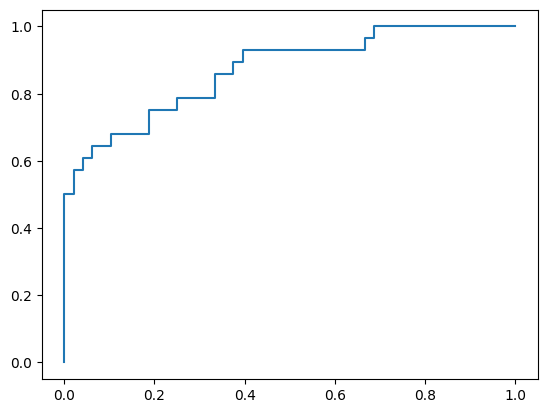

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, proba)

0.8690476190476191

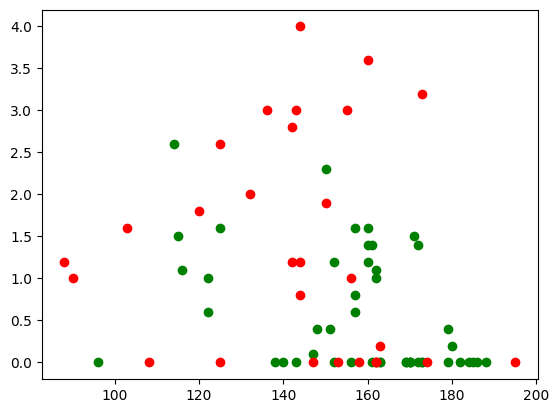

In [34]:
plt.scatter(x_test['max_hr'][y_test == 0], x_test['old_peak'][y_test == 0], color='g')
plt.scatter(x_test['max_hr'][y_test == 1], x_test['old_peak'][y_test == 1], color='r')


In [ ]:
plt.scatter(x_test[])